In [1]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
## Reading data
dfRequisition = pd.read_csv('requisition_master.csv', header=0, index_col=0)
dfRequisition.head(5)

,Requisition,Date Created,Company,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,...,Ready to Submit,Client Rejected Candidate,Declined from Web Apply,Offer Declined,Offer,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates
0,AA155723314,2018-03-14,Auvenir,Product Designer,Product/Project Manager,NaN,NaN,Lost - Filled by Competitor,NaN,NaN,...,0,0,0,0,0,2,0,0,0,5
1,AA177112517,2018-05-17,Auvenir,.NET Developer,Developer,NaN,NaN,Canceled - By Recruiter,NaN,NaN,...,0,0,0,0,0,2,0,0,0,2
2,AA20756542,2018-04-02,1Password,Backend Developer,Developer,62500.0,11250.0,Completed,NaN,NaN,...,0,0,0,0,0,15,1,0,0,17
3,AA276030524,2018-05-24,CaseWare International Inc.,DevOps Developer,Developer,105000.0,18900.0,Completed,2018-06-05,12.0,...,0,0,0,0,0,2,1,1,1,20
4,AA298282119,2018-01-19,Scribd,Software Engineer,Engineer,NaN,NaN,Hold,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1


## Check correlation with 'Time to Fill'

In [3]:
dfRequisition.rank()
dfRequisition.corr('kendall')['Time to Fill'].sort_values()

HasVideoInterview              -0.156245
Video Interview                -0.153895
Client Rejected Candidate      -0.128388
Declined from Web Apply         0.008559
Web Apply                       0.037581
Salary                          0.051287
Hires                           0.066746
SAGE Fee                        0.094298
Ready to Submit                 0.103757
2nd In Person Interview         0.199464
HasInPersonInterview            0.214357
Internal In Person Interview    0.240285
Applicants                      0.243318
Total Unique Candidates         0.260488
In Person Interview             0.277842
Candidate Declined              0.286263
Phone Screen                    0.294830
Client Declined                 0.305545
Candidate Withdrew Interest     0.310210
Submitted                       0.311477
Declined from Pipeline          0.317360
Pipelined                       0.327441
Time to Interview               0.415625
Phone Interview                 0.494754
HasPhoneIntervie

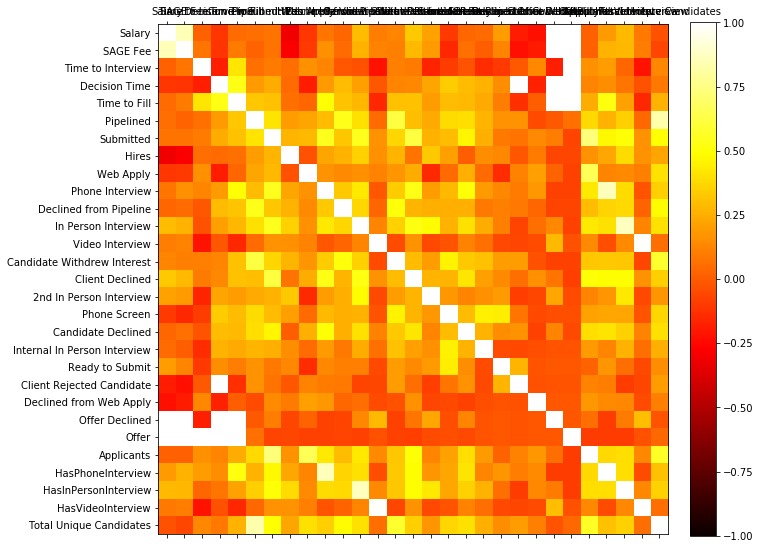

In [4]:
## Graphical Intuition
## A heat map
dfCorrelation = dfRequisition.corr('kendall')
fig = plt.figure() 
plot_axes = fig.add_subplot(111) 
heatmap = plot_axes.matshow(dfCorrelation, vmin=-1, vmax=1, cmap='hot')
fig.colorbar(heatmap, fraction=0.046, pad=0.04)
ticks = np.arange(0, dfCorrelation.columns.size, 1)
plot_axes.set_xticks(ticks)
plot_axes.set_yticks(ticks)
plot_axes.set_yticklabels(dfCorrelation.columns.values)
plot_axes.set_xticklabels(dfCorrelation.columns.values)
fig.set_size_inches((10,10))
plt.show()

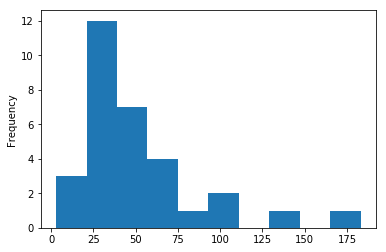

In [5]:
## Distribution of Time to Fill
dfRequisition['Time to Fill'].plot(kind='hist')

In [6]:
dfRequisition['Time to Fill'].describe()

count     31.000000
mean      50.870968
std       38.099643
min        3.000000
25%       31.000000
50%       40.000000
75%       60.000000
max      183.000000
Name: Time to Fill, dtype: float64

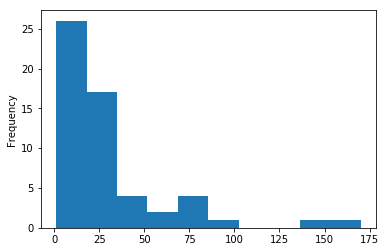

In [7]:
## Distribution of Time to Interview
dfRequisition['Time to Interview'].plot(kind='hist')

In [8]:
dfRequisition['Time to Interview'].describe()

count     56.000000
mean      30.071429
std       32.637322
min        1.000000
25%        9.750000
50%       18.000000
75%       32.250000
max      170.000000
Name: Time to Interview, dtype: float64

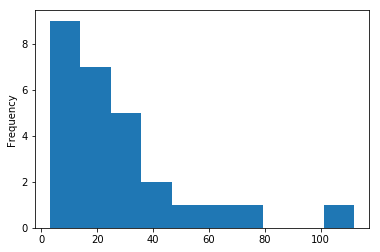

In [9]:
## Distribution of Decision Time
dfRequisition['Decision Time'].plot(kind='hist')

In [10]:
dfRequisition['Decision Time'].describe()

count     27.000000
mean      26.740741
std       24.588291
min        3.000000
25%       11.500000
50%       20.000000
75%       33.000000
max      112.000000
Name: Decision Time, dtype: float64

## Collinearity

In [11]:
dfRequisition.rank()
corr_matrix = dfRequisition.corr('kendall')

## Creating a table of the highest correlations
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
sol

Video Interview              HasVideoInterview               0.986595
In Person Interview          HasInPersonInterview            0.873908
Phone Interview              HasPhoneInterview               0.866705
Salary                       SAGE Fee                        0.856626
Pipelined                    Total Unique Candidates         0.828212
Submitted                    Applicants                      0.728204
Web Apply                    Applicants                      0.656440
Pipelined                    Candidate Withdrew Interest     0.624730
Submitted                    Client Declined                 0.621131
Candidate Withdrew Interest  Total Unique Candidates         0.578754
Applicants                   Total Unique Candidates         0.566268
Submitted                    Phone Interview                 0.548164
                             In Person Interview             0.547804
Pipelined                    Declined from Pipeline          0.541797
Decision Time       

## Graphs

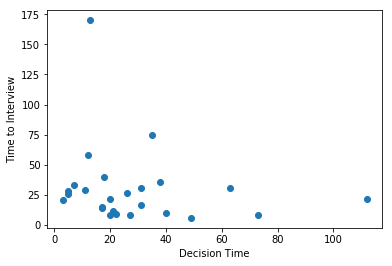

In [12]:
## Decision Time vs Time to Interview
plt.scatter(dfRequisition['Decision Time'], dfRequisition['Time to Interview'])
plt.xlabel('Decision Time')
plt.ylabel('Time to Interview')
plt.show()

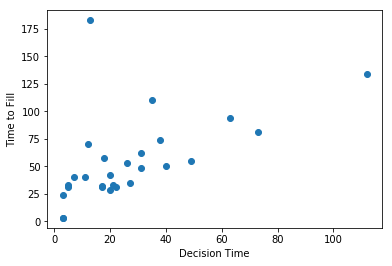

In [13]:
## Decision Time vs Time to Fill
plt.scatter(dfRequisition['Decision Time'], dfRequisition['Time to Fill'])
plt.xlabel('Decision Time')
plt.ylabel('Time to Fill')
plt.show()

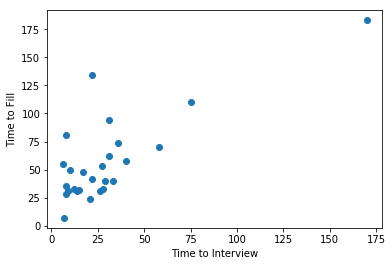

In [14]:
## Time to Interview vs Time to Fill
plt.scatter(dfRequisition['Time to Interview'], dfRequisition['Time to Fill'])
plt.xlabel('Time to Interview')
plt.ylabel('Time to Fill')
plt.show()

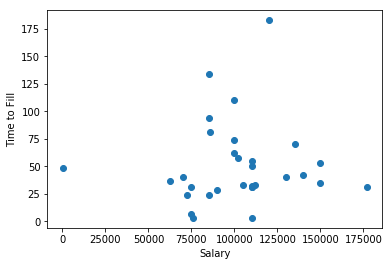

In [15]:
## Salary vs Time to Fill
plt.scatter(dfRequisition['Salary'], dfRequisition['Time to Fill'])
plt.xlabel('Salary')
plt.ylabel('Time to Fill')
plt.show()

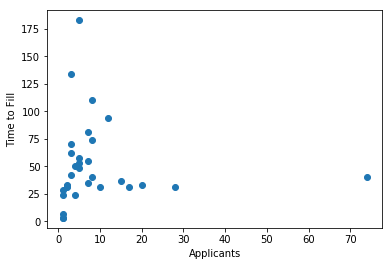

In [16]:
## Applicants vs Time to Fill
plt.scatter(dfRequisition['Applicants'], dfRequisition['Time to Fill'])
plt.xlabel('Applicants')
plt.ylabel('Time to Fill')
plt.show()

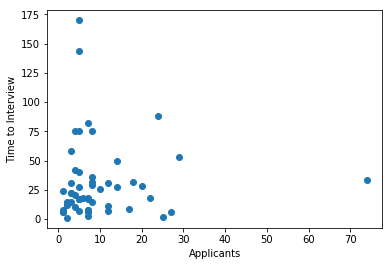

In [17]:
## Applicants vs Time to Interview
plt.scatter(dfRequisition['Applicants'], dfRequisition['Time to Interview'])
plt.xlabel('Applicants')
plt.ylabel('Time to Interview')
plt.show()

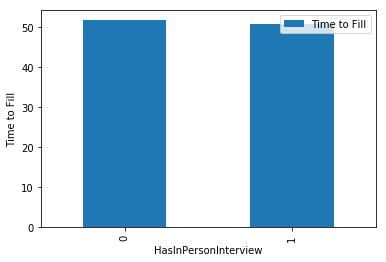

In [18]:
## In Person Interview on Time to Fill
dfRequisition.groupby(by='HasInPersonInterview').mean().plot.bar(y='Time to Fill')
plt.xlabel('HasInPersonInterview')
plt.ylabel('Time to Fill')
plt.show()

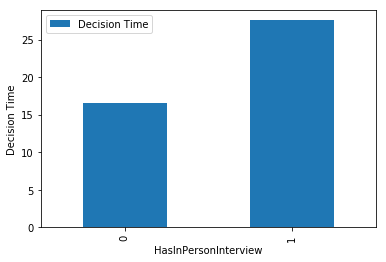

In [19]:
## In-Person Interview on Decision Time
dfRequisition.groupby(by='HasInPersonInterview').mean().plot.bar(y='Decision Time')
plt.xlabel('HasInPersonInterview')
plt.ylabel('Decision Time')
plt.show()

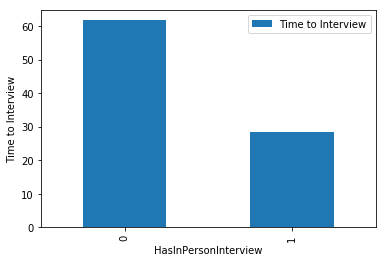

In [20]:
## In-Person Interview on Time to Interview
dfRequisition.groupby(by='HasInPersonInterview').mean().plot.bar(y='Time to Interview')
plt.xlabel('HasInPersonInterview')
plt.ylabel('Time to Interview')
plt.show()

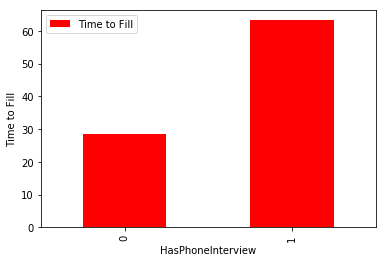

In [21]:
## Phone Interview on Time to Fill
dfRequisition.groupby(by='HasPhoneInterview').mean().plot.bar(y='Time to Fill', color='red')
plt.xlabel('HasPhoneInterview')
plt.ylabel('Time to Fill')
plt.show()

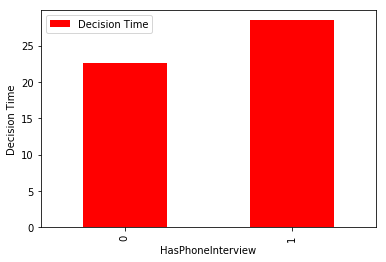

In [22]:
## Phone Interview on Decision Time
dfRequisition.groupby(by='HasPhoneInterview').mean().plot.bar(y='Decision Time', color='red')
plt.xlabel('HasPhoneInterview')
plt.ylabel('Decision Time')
plt.show()

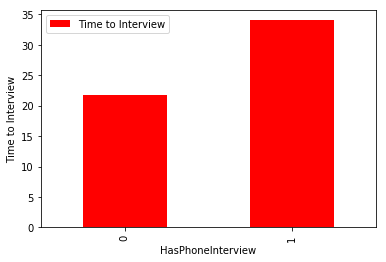

In [23]:
## Phone Interview on Time to Interview
dfRequisition.groupby(by='HasPhoneInterview').mean().plot.bar(y='Time to Interview', color='red')
plt.xlabel('HasPhoneInterview')
plt.ylabel('Time to Interview')
plt.show()

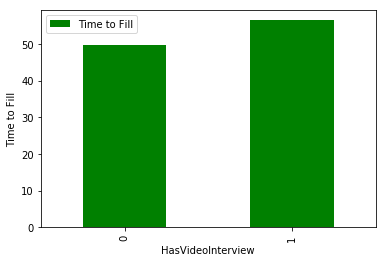

In [24]:
## Video Interview on Time to Fill
dfRequisition.groupby(by='HasVideoInterview').mean().plot.bar(y='Time to Fill', color='green')
plt.xlabel('HasVideoInterview')
plt.ylabel('Time to Fill')
plt.show()

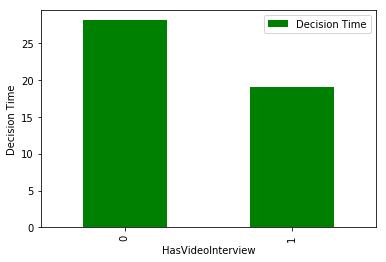

In [25]:
## Video Interview on Decision Time
dfRequisition.groupby(by='HasVideoInterview').mean().plot.bar(y='Decision Time', color='green')
plt.xlabel('HasVideoInterview')
plt.ylabel('Decision Time')
plt.show()

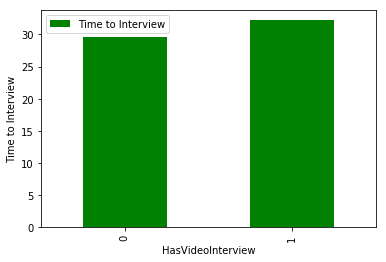

In [26]:
## Video Interview on Time to Interview
dfRequisition.groupby(by='HasVideoInterview').mean().plot.bar(y='Time to Interview', color='green')
plt.xlabel('HasVideoInterview')
plt.ylabel('Time to Interview')
plt.show()

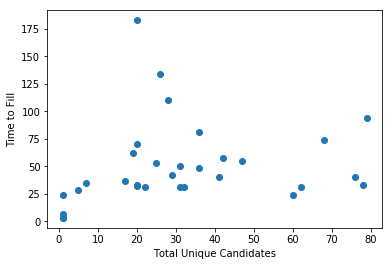

In [27]:
## Number of unique candidates vs Time to Fill
plt.scatter(dfRequisition['Total Unique Candidates'], dfRequisition['Time to Fill'])
plt.xlabel('Total Unique Candidates')
plt.ylabel('Time to Fill')
plt.show()

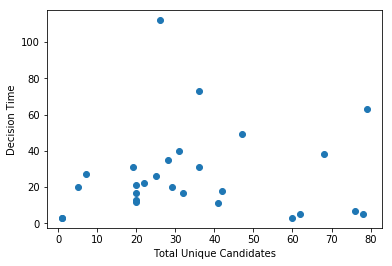

In [28]:
## Number of unique candidates vs Decision Time
plt.scatter(dfRequisition['Total Unique Candidates'], dfRequisition['Decision Time'])
plt.xlabel('Total Unique Candidates')
plt.ylabel('Decision Time')
plt.show()

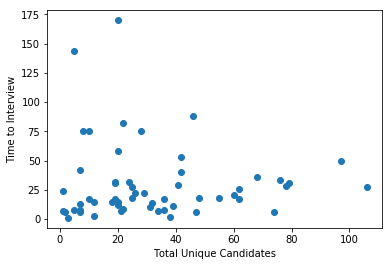

In [29]:
## Number of unique candidates vs Time to Fill
plt.scatter(dfRequisition['Total Unique Candidates'], dfRequisition['Time to Interview'])
plt.xlabel('Total Unique Candidates')
plt.ylabel('Time to Interview')
plt.show()

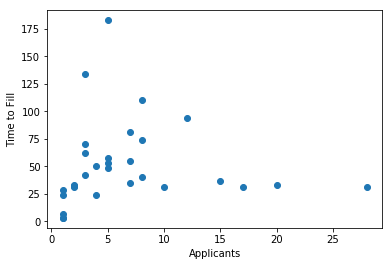

In [30]:
## Number of unique candidates vs Time to Fill
plt.scatter(dfRequisition[dfRequisition['Applicants'] < 40]['Applicants'], dfRequisition[dfRequisition['Applicants'] < 40]['Time to Fill'])
plt.xlabel('Applicants')
plt.ylabel('Time to Fill')
plt.show()

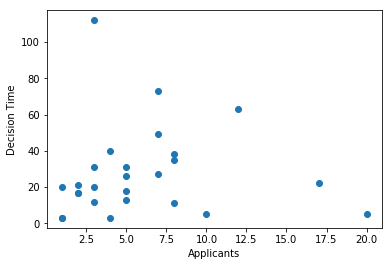

In [31]:
## Number of unique candidates vs Decision Time
plt.scatter(dfRequisition[dfRequisition['Applicants'] < 40]['Applicants'], dfRequisition[dfRequisition['Applicants'] < 40]['Decision Time'])
plt.xlabel('Applicants')
plt.ylabel('Decision Time')
plt.show()

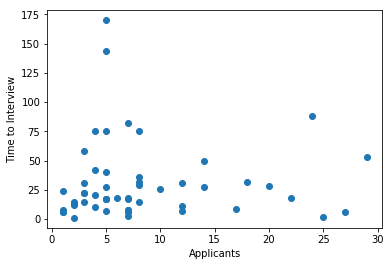

In [32]:
## Number of unique candidates vs Time to Fill
plt.scatter(dfRequisition[dfRequisition['Applicants'] < 40]['Applicants'], dfRequisition[dfRequisition['Applicants'] < 40]['Time to Interview'])
plt.xlabel('Applicants')
plt.ylabel('Time to Interview')
plt.show()

## Fitting a Linear Model

In [33]:
## Only including data that are filled
dfRequisitionFilled = dfRequisition[dfRequisition['Time to Fill'] > 0]
dfRequisitionFilled.head(5)

,Requisition,Date Created,Company,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,...,Ready to Submit,Client Rejected Candidate,Declined from Web Apply,Offer Declined,Offer,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates
2,AA20756542,2018-04-02,1Password,Backend Developer,Developer,62500.0,11250.0,Completed,NaN,NaN,...,0,0,0,0,0,15,1,0,0,17
3,AA276030524,2018-05-24,CaseWare International Inc.,DevOps Developer,Developer,105000.0,18900.0,Completed,2018-06-05,12.0,...,0,0,0,0,0,2,1,1,1,20
7,AA370626414,2018-04-15,StickerYou,Senior Software Developer,Developer,102000.0,18360.0,Completed,2018-05-25,40.0,...,0,0,0,0,0,5,1,1,0,42
12,AA430057312,2018-03-12,Firmex Inc.,Technical Product Manager,Developer,110000.0,19800.0,Completed,2018-03-27,15.0,...,0,0,0,0,0,2,1,1,0,20
14,AA448082526,2019-05-26,ShiftLeft,.NET instrumentation engineer,Engineer,177000.0,35400.0,Completed,2019-06-04,9.0,...,0,0,0,0,0,17,0,1,1,22


In [34]:
## Look for zeroes
dfRequisitionFilled = dfRequisitionFilled.dropna()

In [35]:
## Select the variables - We take away those that are irrelevant
dfX = dfRequisitionFilled[['Salary', 'Time to Interview', 'Decision Time', 'Total Unique Candidates', 'Applicants', 'Hires', 'Web Apply', 'HasPhoneInterview', 
                           'HasInPersonInterview', 'HasVideoInterview']]
dfY = dfRequisitionFilled['Time to Fill']

In [36]:
## Splitting the sets. This is tough as sample size is too small. We will use bootstrapping
## Import scikit learn tools
from sklearn.model_selection import train_test_split

## Divide the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)
X_train.count(), X_test.count()

(Salary                     15
 Time to Interview          15
 Decision Time              15
 Total Unique Candidates    15
 Applicants                 15
 Hires                      15
 Web Apply                  15
 HasPhoneInterview          15
 HasInPersonInterview       15
 HasVideoInterview          15
 dtype: int64, Salary                     10
 Time to Interview          10
 Decision Time              10
 Total Unique Candidates    10
 Applicants                 10
 Hires                      10
 Web Apply                  10
 HasPhoneInterview          10
 HasInPersonInterview       10
 HasVideoInterview          10
 dtype: int64)

In [37]:
## Variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

dfVIF = add_constant(X_train)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

C:\Users\Weiran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0
const,201.073259
Salary,8.121281
Time to Interview,2.778755
Decision Time,6.429920
Total Unique Candidates,33.055542
Applicants,1088.888822
Hires,6.644440
Web Apply,1043.192935
HasPhoneInterview,4.004399
HasInPersonInterview,5.102819


In [38]:
## Correlation Matrix
dfRequisition[['Salary', 'Time to Interview', 'Decision Time', 'Total Unique Candidates', 'Applicants', 'Hires', 'Web Apply', 'HasPhoneInterview', 
                           'HasInPersonInterview', 'HasVideoInterview']].corr('kendall')

,Salary,Time to Interview,Decision Time,Total Unique Candidates,Applicants,Hires,Web Apply,HasPhoneInterview,HasInPersonInterview,HasVideoInterview
Salary,1.000000,0.022225,-0.103723,-0.026877,0.022858,-0.311513,-0.106219,0.189204,0.287392,0.087607
Time to Interview,0.022225,1.000000,-0.179357,0.136860,0.163209,0.057427,0.159894,0.201781,0.034706,-0.211246
Decision Time,-0.103723,-0.179357,1.000000,0.090248,0.128405,0.050833,-0.179721,0.148689,0.083874,-0.028106
Total Unique Candidates,-0.026877,0.136860,0.090248,1.000000,0.566268,0.221610,0.399083,0.306002,0.355805,0.057024
Applicants,0.022858,0.163209,0.128405,0.566268,1.000000,0.165485,0.656440,0.375678,0.394417,0.139310
Hires,-0.311513,0.057427,0.050833,0.221610,0.165485,1.000000,-0.029552,0.227565,0.390411,0.164117
Web Apply,-0.106219,0.159894,-0.179721,0.399083,0.656440,-0.029552,1.000000,0.130318,0.145674,0.109800
HasPhoneInterview,0.189204,0.201781,0.148689,0.306002,0.375678,0.227565,0.130318,1.000000,0.394450,-0.040343
HasInPersonInterview,0.287392,0.034706,0.083874,0.355805,0.394417,0.390411,0.145674,0.394450,1.000000,0.138932
HasVideoInterview,0.087607,-0.211246,-0.028106,0.057024,0.139310,0.164117,0.109800,-0.040343,0.138932,1.000000


In [39]:
## Drop web-apply
dfX = dfRequisitionFilled[['Salary', 'Total Unique Candidates', 'Applicants', 'Hires', 'HasPhoneInterview', 
                           'HasInPersonInterview', 'HasVideoInterview']]
dfY = dfRequisitionFilled['Time to Fill']

## Divide the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)

## VIF
dfVIF = add_constant(X_train)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

,0
const,59.245033
Salary,3.334500
Total Unique Candidates,3.008525
Applicants,1.718015
Hires,4.020396
HasPhoneInterview,1.871147
HasInPersonInterview,4.041237
HasVideoInterview,7.394049


In [40]:
## Fitting linear regression model
## Import the linear regression function from scikit learn tools
from sklearn.linear_model import LinearRegression

## Create linear regression object
linearRegression = LinearRegression()

## Fit data
fit1 = linearRegression.fit(X_train, Y_train)

## Print the intercepts
linearRegression.intercept_

101.69657642954208

In [41]:
## Print the coefficients
pd.DataFrame(linearRegression.coef_, dfX.columns, ['Regression Coeffs'])

,Regression Coeffs
Salary,0.000074
Total Unique Candidates,-0.139557
Applicants,-0.319626
Hires,10.222082
HasPhoneInterview,31.756605
HasInPersonInterview,-78.022622
HasVideoInterview,-27.396821


In [42]:
## Creating predicted values
Y_predicted = linearRegression.predict(X_test)

## Computing residuals
residuals = Y_test - Y_predicted

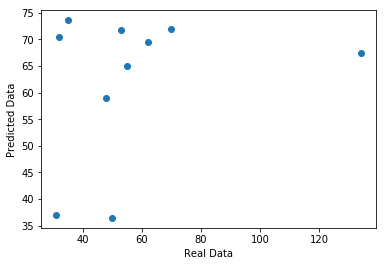

In [43]:
## How good is our predictions? Let's test graphically
plt.scatter(Y_test, Y_predicted)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.show()
## To be honest, not that great

In [44]:
## Testing for homoscedasticity
stats.levene(Y_test, Y_predicted)
## Homoscedastic

LeveneResult(statistic=1.0174330459878398, pvalue=0.3264966071242492)

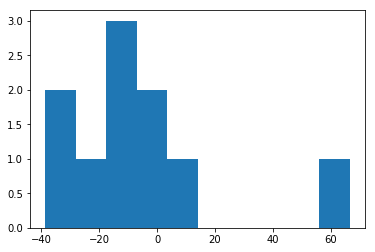

C:\Users\Weiran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=9.611473648748063, pvalue=0.00818266960219366)

In [45]:
## Testing that residuals are normally distributed
plt.hist(residuals)
plt.show()

## We can also use a test!
stats.normaltest(residuals)
## Not normal!

In [46]:
## Computing R-square
Y_mean = np.mean(Y_test)
ESS = (Y_predicted - Y_mean)**2
TSS = (Y_test - Y_mean)**2
rSquared = ESS.sum() / TSS.sum()
rSquared
## Pretty low R-square

0.25430021744977427

## Approach 2: Let's test individual components

In [47]:
dfX = dfRequisitionFilled[['Decision Time', 'Salary', 'Total Unique Candidates', 'Applicants', 'Hires', 'HasPhoneInterview', 
                           'HasInPersonInterview', 'HasVideoInterview']]
dfY = dfRequisitionFilled['Time to Interview']

## Divide the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)

## VIF
dfVIF = add_constant(X_train)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

C:\Users\Weiran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0
const,59.480247
Decision Time,1.615253
Salary,3.490259
Total Unique Candidates,3.101989
Applicants,2.122202
Hires,5.337064
HasPhoneInterview,2.311195
HasInPersonInterview,4.237185
HasVideoInterview,8.976373


In [48]:
## Fitting linear regression model
## Import the linear regression function from scikit learn tools
from sklearn.linear_model import LinearRegression

## Create linear regression object
linearRegression = LinearRegression()

## Fit data
fit1 = linearRegression.fit(X_train, Y_train)

## Print the intercepts
linearRegression.intercept_

90.61273627220355

In [49]:
## Print the coefficients
pd.DataFrame(linearRegression.coef_, dfX.columns, ['Regression Coeffs'])

,Regression Coeffs
Decision Time,0.445113
Salary,-0.000265
Total Unique Candidates,0.157937
Applicants,0.521767
Hires,-55.337458
HasPhoneInterview,66.039142
HasInPersonInterview,-48.262630
HasVideoInterview,37.611724


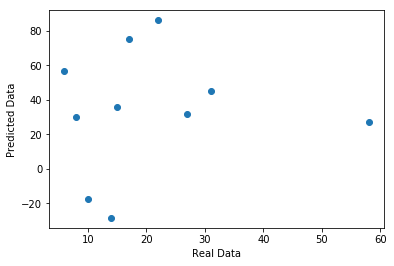

In [50]:
## Creating predicted values
Y_predicted = linearRegression.predict(X_test)

## Computing residuals
residuals = Y_test - Y_predicted

## How good is our predictions? Let's test graphically
plt.scatter(Y_test, Y_predicted)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.show()
## To be honest, not that great

In [51]:
## Testing for homoscedasticity
stats.levene(Y_test, Y_predicted)
## Homoscedastic (barely)

LeveneResult(statistic=3.293404678021678, pvalue=0.08626000328450041)

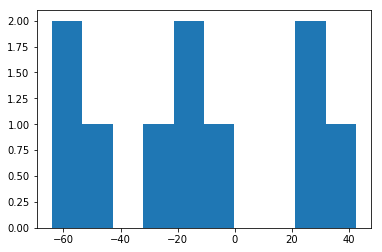

C:\Users\Weiran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.2217578585382585, pvalue=0.5428735119045883)

In [52]:
## Testing that residuals are normally distributed
plt.hist(residuals)
plt.show()

## We can also use a test!
stats.normaltest(residuals)
## Normal, but really bimodal

## Approach 3: Testing for Decision Time

In [71]:
dfX = dfRequisitionFilled[['Time to Interview', 'Salary', 'Total Unique Candidates', 'Applicants', 'HasPhoneInterview', 
                           'HasInPersonInterview', 'HasVideoInterview']]
dfY = dfRequisitionFilled['Decision Time']

## Divide the training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(dfX, dfY, test_size=0.4, random_state=0)

## VIF
dfVIF = add_constant(X_train)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

C:\Users\Weiran\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,0
const,45.529983
Time to Interview,2.200107
Salary,1.624669
Total Unique Candidates,2.950220
Applicants,1.414235
HasPhoneInterview,1.727920
HasInPersonInterview,3.402890
HasVideoInterview,3.174194


In [72]:
## Fitting linear regression model
## Import the linear regression function from scikit learn tools
from sklearn.linear_model import LinearRegression

## Create linear regression object
linearRegression = LinearRegression()

## Fit data
fit1 = linearRegression.fit(X_train, Y_train)

## Print the intercepts
linearRegression.intercept_

43.227715253183035

In [73]:
## Print the coefficients
pd.DataFrame(linearRegression.coef_, dfX.columns, ['Regression Coeffs'])

,Regression Coeffs
Time to Interview,0.068599
Salary,-0.000228
Total Unique Candidates,-0.112395
Applicants,-0.295718
HasPhoneInterview,-10.107770
HasInPersonInterview,21.460387
HasVideoInterview,-1.576770


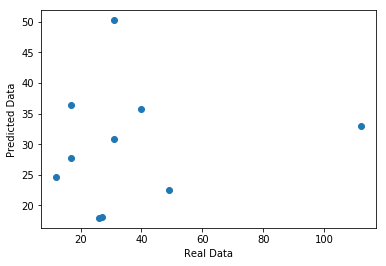

In [74]:
## Creating predicted values
Y_predicted = linearRegression.predict(X_test)

## Computing residuals
residuals = Y_test - Y_predicted

## How good is our predictions? Let's test graphically
plt.scatter(Y_test, Y_predicted)
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.show()
## To be honest, not that great

In [75]:
## Testing for homoscedasticity
stats.levene(Y_test, Y_predicted)
## Homoscedastic

LeveneResult(statistic=1.267919250930557, pvalue=0.27494693787192953)

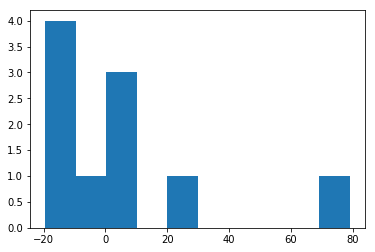

C:\Users\Weiran\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=12.322088141873794, pvalue=0.002110049080346645)

In [76]:
## Testing that residuals are normally distributed
plt.hist(residuals)
plt.show()

## We can also use a test!
stats.normaltest(residuals)
## Normal, but really bimodal

In [77]:
## Computing R-square
Y_mean = np.mean(Y_test)
ESS = (Y_predicted - Y_mean)**2
TSS = (Y_test - Y_mean)**2
rSquared = ESS.sum() / TSS.sum()
rSquared
## Pretty low R-square

0.17138559360391217

## Companies that slip

In [59]:
dfSlipped = dfRequisition.groupby(by='Company').count()
dfSlipped

,Requisition,Date Created,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,Decision Time,...,Ready to Submit,Client Rejected Candidate,Declined from Web Apply,Offer Declined,Offer,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates
Company,,,,,,,,,,,,,,,,,,,,,
1Password,8,8,8,8,5,5,8,4,2,3,...,8,8,8,8,8,8,8,8,8,8
ATP CaseBank,3,3,3,3,1,1,3,1,1,1,...,3,3,3,3,3,3,3,3,3,3
Aislelabs,2,2,2,2,0,0,2,1,1,0,...,2,2,2,2,2,2,2,2,2,2
Auvenir,3,3,3,3,0,0,3,0,0,0,...,3,3,3,3,3,3,3,3,3,3
BiblioCommons,1,1,1,1,0,0,1,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Brookfield Global Integrated Solutions,2,2,2,2,1,1,2,0,0,0,...,2,2,2,2,2,2,2,2,2,2
CaseWare International Inc.,12,12,12,12,6,6,12,9,9,6,...,12,12,12,12,12,12,12,12,12,12
DealTap,5,5,5,5,1,1,5,2,2,1,...,5,5,5,5,5,5,5,5,5,5
Dealer-FX,1,1,1,1,0,0,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1


In [60]:
## Interview Rate
dfSlipped['Interview Rate'] = dfSlipped['Time to Interview'] / dfSlipped['Requisition']

## Hire Rate
dfSlipped['Hire Rate'] = dfSlipped['SAGE Fee'] / dfSlipped['Requisition']

## Hire from Interview
dfSlipped['Hire from Interview'] = (dfSlipped['Time to Interview'] - dfSlipped['SAGE Fee'])/ dfSlipped['Requisition']

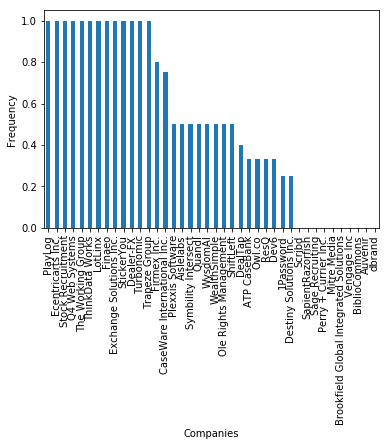

In [61]:
## Interview Rate
dfSlipped.sort_values(by='Interview Rate', ascending=False)['Interview Rate'].plot.bar()
plt.xlabel('Companies')
plt.ylabel('Frequency')
plt.show()

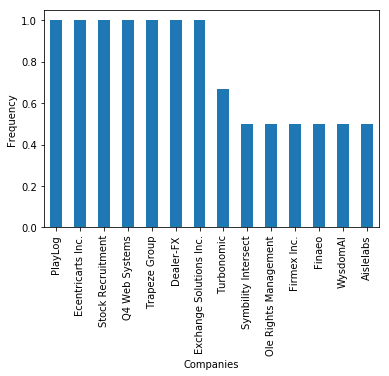

In [62]:
## Interview Rate Good
dfSlipped.sort_values(by='Hire from Interview', ascending=False)['Hire from Interview'].head(14).plot.bar()
plt.xlabel('Companies')
plt.ylabel('Frequency')
plt.show()

In [63]:
dfSlipped[(dfSlipped['Interview Rate'] > 0) & (dfSlipped['Hire from Interview'] >= 0)].sort_values(by='Hire from Interview', ascending=False)[['Hire from Interview','Requisition']]

,Hire from Interview,Requisition
Company,,
PlayLog,1.000000,1
Trapeze Group,1.000000,1
Dealer-FX,1.000000,1
Stock Recruitment,1.000000,1
Ecentricarts Inc.,1.000000,2
Exchange Solutions Inc.,1.000000,1
Q4 Web Systems,1.000000,2
Turbonomic,0.666667,3
Ole Rights Management,0.500000,2


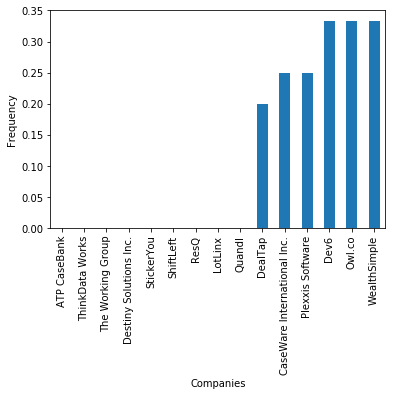

In [64]:
## Interview Rate Bad
dfSlipped[(dfSlipped['Interview Rate'] > 0) & (dfSlipped['Hire from Interview'] >= 0)].sort_values(by='Hire from Interview')['Hire from Interview'].head(15).plot.bar()
plt.xlabel('Companies')
plt.ylabel('Frequency')
plt.show()

In [65]:
dfRequisition[dfRequisition['Company'] == '1Password']

,Requisition,Date Created,Company,Job Title,Job Category,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,...,Ready to Submit,Client Rejected Candidate,Declined from Web Apply,Offer Declined,Offer,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates
2,AA20756542,2018-04-02,1Password,Backend Developer,Developer,62500.0,11250.0,Completed,NaN,NaN,...,0,0,0,0,0,15,1,0,0,17
8,AA371919314,2019-03-14,1Password,Proactive Jobs,Others,NaN,NaN,Hold,NaN,NaN,...,0,0,0,0,0,2,0,0,0,2
20,AA554833316,2018-03-16,1Password,Software Developer,Developer,75000.0,13500.0,Completed,2018-03-23,7.0,...,0,0,0,0,0,1,0,0,1,1
21,AA555705316,2018-03-16,1Password,Software Developer,Developer,76000.0,0.0,Completed,2018-03-16,NaN,...,0,0,0,0,0,1,0,1,0,1
26,AA624626316,2018-03-16,1Password,Human Resources,Others,110000.0,19800.0,Completed,2018-03-16,NaN,...,0,0,0,0,0,1,0,1,0,1
38,AA85086427,2019-02-07,1Password,Junior Software Engineer,Engineer,70000.0,12600.0,Completed,2019-03-12,33.0,...,0,0,1,0,0,74,1,1,0,76
75,MM610339920,2018-09-20,1Password,System Administrator,Product/Project Manager,NaN,NaN,Hold,NaN,NaN,...,0,0,0,0,0,1,0,0,0,1
87,MM851097516,2018-05-16,1Password,Android Developer,Developer,NaN,NaN,Hold,NaN,NaN,...,0,0,0,0,0,7,0,0,0,80


## By Job Category

In [66]:
dfCategory = dfRequisition.groupby(by='Job Category').count()
dfCategory['Unmatched'] = dfCategory['Requisition'] - dfCategory['Salary']
dfCategory['Matched'] = dfCategory['Salary']
dfCategory

,Requisition,Date Created,Company,Job Title,Salary,SAGE Fee,Status,First Interview Date,Time to Interview,Decision Time,...,Declined from Web Apply,Offer Declined,Offer,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates,Unmatched,Matched
Job Category,,,,,,,,,,,,,,,,,,,,,
Developer,44,44,44,44,14,14,44,21,20,12,...,44,44,44,44,44,44,44,44,30,14
Engineer,32,32,32,32,9,9,32,17,17,9,...,32,32,32,32,32,32,32,32,23,9
Management,13,13,13,13,3,3,13,10,10,3,...,13,13,13,13,13,13,13,13,10,3
Others,9,9,9,9,2,2,9,5,4,1,...,9,9,9,9,9,9,9,9,7,2
Product/Project Manager,18,18,18,18,3,3,18,5,5,2,...,18,18,18,18,18,18,18,18,15,3


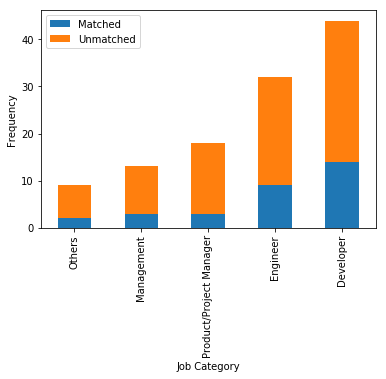

In [67]:
## Distribution of job categories
dfCategory.sort_values(by='Requisition')[['Matched', 'Unmatched']].plot(kind='bar', stacked=True)
plt.xlabel('Job Category')
plt.ylabel('Frequency')
plt.show()

In [68]:
dfCategorySum = dfRequisition.groupby(by='Job Category').sum()
dfCategorySum['Average Salary'] = dfCategorySum['Salary'] / dfCategory['Matched']
dfCategorySum['Salary per Requisition'] = dfCategorySum['Salary'] / dfCategory['Requisition']
dfCategorySum

,Salary,SAGE Fee,Time to Interview,Decision Time,Time to Fill,Pipelined,Submitted,Hires,Web Apply,Phone Interview,...,Declined from Web Apply,Offer Declined,Offer,Applicants,HasPhoneInterview,HasInPersonInterview,HasVideoInterview,Total Unique Candidates,Average Salary,Salary per Requisition
Job Category,,,,,,,,,,,,,,,,,,,,,
Developer,1243095.0,210677.1,596.0,359.0,629.0,1020,147,18,134,52,...,0,1,1,281,20,20,6,1218,88792.500000,28252.159091
Engineer,1034000.0,198600.0,711.0,163.0,609.0,630,98,10,154,47,...,2,0,0,252,18,15,3,827,114888.888889,32312.500000
Management,346000.0,60320.0,180.0,139.0,184.0,169,37,3,16,12,...,0,0,0,53,6,10,0,194,115333.333333,26615.384615
Others,185000.0,20550.0,112.0,3.0,34.0,68,24,2,50,4,...,0,0,0,74,2,5,0,125,92500.000000,20555.555556
Product/Project Manager,335000.0,62300.0,85.0,58.0,121.0,242,55,3,41,23,...,0,0,0,96,8,5,1,303,111666.666667,18611.111111


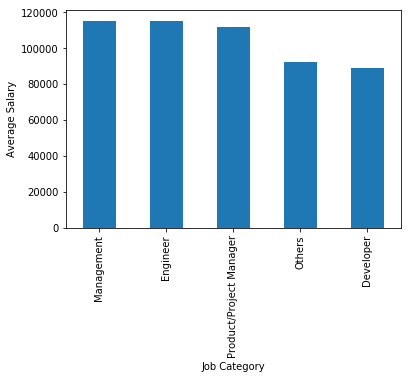

In [69]:
## Distribution of job revenues
dfCategorySum.sort_values(by='Average Salary', ascending=False)['Average Salary'].plot(kind='bar')
plt.xlabel('Job Category')
plt.ylabel('Average Salary')
plt.show()

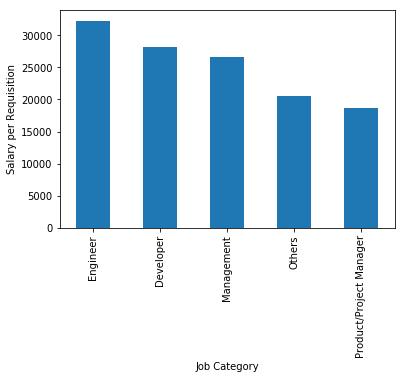

In [70]:
## Distribution of revenue per requisition
dfCategorySum.sort_values(by='Salary per Requisition', ascending=False)['Salary per Requisition'].plot(kind='bar')
plt.xlabel('Job Category')
plt.ylabel('Salary per Requisition')
plt.show()